## Building Classification Models and Parameter Tunning

#Brief Explanation 

### Load Data and Compute TFIDF Matrix

In [1]:
def scikit_TFIDF(n_feat,Train,Test):
    
    '''This method returns the TFIDF matrixes for both training and testing data'''
    t=TfidfVectorizer(max_features=n_feat)
    tfidf_train = t.fit_transform(Train.values.astype('U')).toarray()
    tfidf_test= t.transform(Test.values.astype('U')).toarray()
    
    return tfidf_train,tfidf_test

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


# Load the data
positive=pd.read_table("positive-words.txt")
negative=pd.read_table("negative-words.txt")

#Load Sentiment104 Processed Data 
Sentiment=pd.read_csv("Tweets_50kProc.csv")
y=Sentiment.label
X=Sentiment.tweets

#Change label instead of 0-4 to 0-1
y_bin=[1 if x > 0 else 0 for x in y]
#40,000 and #10,000
train_X,test_X,train_y,text_y=train_test_split(X,y_bin,test_size=0.2,random_state=123)

#Compyte the TFIDF matrix
tfidf_Train,tfidf_Test=scikit_TFIDF(20000,train_X,test_X)

### Baseline Model : Polarity Based Model


In [15]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score
import numpy as np

#This will use just the training part of the dataset to compute accuracies.

def Baseline_Model(tweets):
    labels=[]
    for i in range(0,len(tweets)):
        pol,subj=TextBlob(str(tweets[i])).sentiment
        if pol < 0:
            label=1
        else:
            label=0
        labels.append(label)
    return labels

pred=Baseline_Model(np.array(train_X))

In [57]:
accuracy_score(pred,train_y)

0.39108477711942796

### SVM Using TFIDF with hinge loss

In [ ]:
import pandas as pd
from sklearn import svm
import csv
from sklearn.metrics import classification_report

# Build SVM Model
model = svm.LinearSVC(max_iter = 10000, intercept_scaling = 1, C=1,loss = 'hinge')
# Fit Model
model.fit(tfidf_Train, train_y)
# Prediction
pred = model.predict(tfidf_Test)



In [ ]:
print(classification_report(pred,text_y))

In [ ]:
print(accuracy_score(pred,text_y))

In [ ]:
import numpy as np

# Build SVM Model
model = svm.LinearSVC(max_iter = 10000, intercept_scaling = 1, C=10,loss = 'hinge')
# Fit Model
model.fit(tfidf_Train, train_y)
# Prediction
pred = model.predict(tfidf_Test)
#Save accuracy
print(accuracy_score(pred,text_y))

In [ ]:
# Build SVM Model
model = svm.LinearSVC(max_iter = 10000, intercept_scaling = 1, C=0.1,loss = 'hinge')
# Fit Model
model.fit(tfidf_Train, train_y)
# Prediction
pred = model.predict(tfidf_Test)
#Save accuracy
print(accuracy_score(pred,text_y))

Since the value of C controls the margins for the SVM classifier, I want to test 3 different values of C to see if there is an effect in the accuracy.


### What about using other kernels? Gaussian and Sigmoid  
####COMPUTER FREEZES!

In [ ]:
rbf_SVM=svm.SVC(kernel="sigmoid",C=1)
rbf_SVM.fit(tfidf_Train, train_y)
pred=rbf_SVM.predict(tfidf_Test)
print(classification_report(pred,text_y))


In [ ]:
print(accuracy_score(pred,text_y))

###  Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
import numpy as np

#For C=1
log=LogisticRegression(C=1)
log.fit(tfidf_Train,train_y)
pred_log=log.predict(tfidf_Test)

accuracy_score(pred_log,text_y)

0.7774

### Test different penalty parameters


In [25]:
C=np.linspace(1,10,1,endpoint=False)
for c in range(1,10):
    log=LogisticRegression(C=c)
    log.fit(tfidf_Train,train_y)
    pred_log=log.predict(tfidf_Test)
    print(accuracy_score(pred_log,text_y))



0.7774
0.777
0.7757
0.7748
0.7736
0.7725
0.7707
0.7693
0.7689


In [26]:
#test with a smaller value of C 

log=LogisticRegression(C=0.001)
log.fit(tfidf_Train,train_y)
pred_log=log.predict(tfidf_Test)

accuracy_score(pred_log,text_y)

0.7037

### Neural Network with TFDIF

In [36]:
from keras.utils import to_categorical
from keras import models
from keras import layers

model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(20000, )))

# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

# compiling the model
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 50)                1000050   
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 51        
Total params: 1,002,651
Trainable params: 1,002,651
Non-trainable params: 0
_________________________________________________________________


In [39]:
results = model.fit(tfidf_Train, train_y, epochs= 3, batch_size = 500, validation_data = (tfidf_Test, text_y))
print("Test-Accuracy:", np.mean(results.history["val_acc"]))

Train on 39999 samples, validate on 10000 samples
Epoch 1/3
39999/39999 [==============================] - 19s 465us/step - loss: 0.2219 - acc: 0.9127 - val_loss: 0.6122 - val_acc: 0.7577
Epoch 2/3
39999/39999 [==============================] - 20s 489us/step - loss: 0.1872 - acc: 0.9272 - val_loss: 0.6649 - val_acc: 0.7540
Epoch 3/3
39999/39999 [==============================] - 19s 475us/step - loss: 0.1574 - acc: 0.9421 - val_loss: 0.7307 - val_acc: 0.7494
Test-Accuracy: 0.7536999980608622


#best validation after 1 epoch after that it starts to decrease in generalization.  

### Neural Network with tanh activation function for output



In [44]:
from keras.utils import to_categorical
from keras import models
from keras import layers

model = models.Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(20000, )))

# Hidden - Layers
model.add(layers.Dropout(0.3, noise_shape=None, seed=None))
model.add(layers.Dense(50, activation = "relu"))

# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

# compiling the model
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])

results_tanh = model.fit(tfidf_Train, train_y, epochs= 3, batch_size = 1000, validation_data = (tfidf_Test, text_y))
print("Test-Accuracy:", np.mean(results_tanh.history["val_acc"]))

#best after second epoch.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 50)                1000050   
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 51        
Total params: 1,002,651
Trainable params: 1,002,651
Non-trainable params: 0
_________________________________________________________________
Train on 39999 samples, validate on 10000 samples
Epoch 1/3
39999/39999 [==============================] - 25s 624us/step - loss: 0.6676 - acc: 0.6986 - val_loss: 0.6089 - val_acc: 0.7589
Epoch 2/3
39999/39999 [==============================] - 22s 543us/step - lo

## Performance of Models

In [ ]:
CONFUSION MATRICES, AUC ROC CURVES

## Validation with Trump Tweets

From our 4 models tested the best model was a Logistic Regression with C=1. We will use such model to make predictions about Trump Tweets.

In [52]:
import pandas as pd
 
Trump=pd.read_csv("Trump_Processed.csv")
tfidf_Train,tfidf_Trump=scikit_TFIDF(20000,train_X,Trump.tweets)

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=1)
log.fit(tfidf_Train,train_y)
pred_log=log.predict(tfidf_Trump)

In [62]:
#Positive and Negative Predicted Tweets
n=len(Trump.tweets)
print("Number of Positive Trump Tweets",list(pred_log).count(1), "with proportion:",list(pred_log).count(1)/n,"\n")
print("Number of Negative Trump Tweets",list(pred_log).count(0), "with proportion:",list(pred_log).count(0)/n,"\n")

Number of Positive Tweets 18099 with proportion: 0.5956557511930228 

Number of Negative Tweets 12286 with proportion: 0.4043442488069771 



In [64]:
negative_tweets=Trump.tweets[pred_log != 1]

In [77]:
import nltk
from nltk.corpus import stopwords
stop_words=set(nltk.corpus.stopwords.words('english'))

negative_list=pd.read_table("negative-words.txt")



'no wonder the today show on biased  is doing so badly compared to its glorious past little credibility'

In [80]:
bad_words=[bad for nt in negative_tweets for bad in nltk.word_tokenize(nt) if bad not in stop_words]
p_bad=[word for word in bad_words if not word.isnumeric()]
BadDist=nltk.FreqDist(p_bad)
words_b=BadDist.most_common(50)

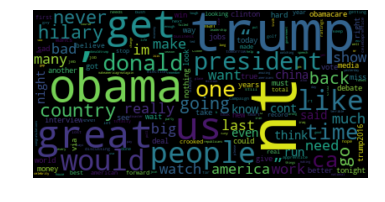

In [92]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wordcloud=WordCloud()
wordcloud.generate_from_frequencies(frequencies=BadDist)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


# Word Cloud based on frequency of words shows that most of the tweets labelled as negative came from tweets discussing politics, we can see here the names Obama, Hillary and as a fact we know that those tweets were bashing its oponents, really small in the right corner trump2016 appears as well.  Very narcissitically the word trump is mentioned frequently. 